**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


## Import data

In [2]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "results.enrich.merge.overall.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath)

dat_enrich_total = dat
print(dim(dat))
head(dat)

ERROR: Error: '/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/region/KS91_K562_ASTARRseq_peak_macs_input/summary/results.enrich.merge.overall.tsv' does not exist.


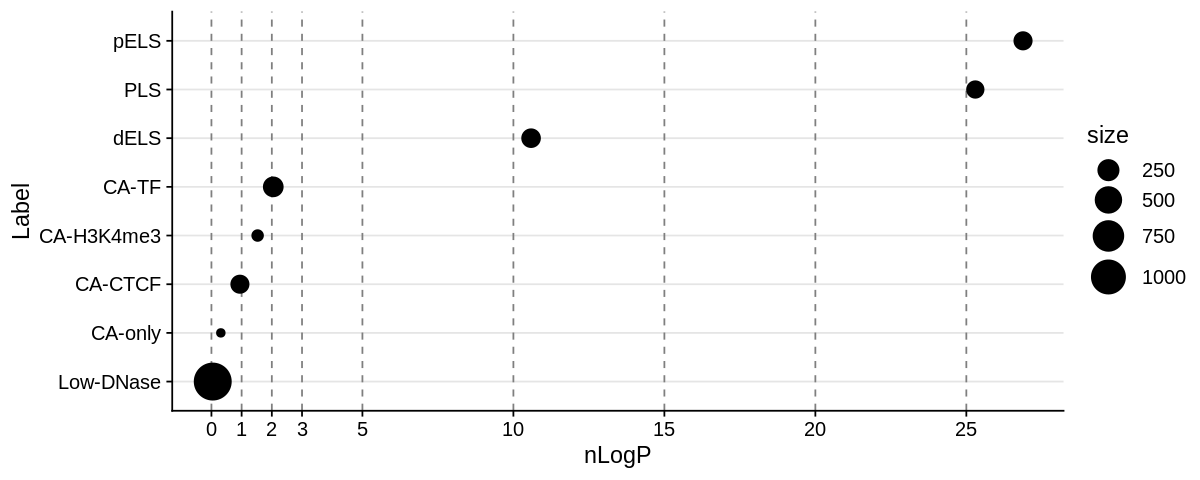

In [5]:
dat = dat_enrich_total
dat = dat %>% 
    dplyr::filter(Annotation == "ccre_v4") %>%
    dplyr::arrange(nLogP) %>%
    dplyr::mutate(Label = factor(Label, levels=Label))

gpt = ggplot(dat, aes(x=nLogP, y=Label, size=size)) +
     geom_point() +
     scale_size(range=c(2,10)) +
     scale_x_continuous(
         breaks = c(0, 1, 2, 3, 5, 10, 15, 20, 25, 30)) +
     theme_cowplot() +
     theme(
         panel.grid.major.x = element_line(color = "grey50", size = 0.5, linetype = 2),
         panel.grid.major.y = element_line(color = "grey90", size = 0.5, linetype = 1)
     )

options(repr.plot.height=4, repr.plot.width=10)
print(gpt)

In [6]:
dat = dat_enrich_total
table(dat$Annotation)


        ccre_v3         ccre_v4 ChIPseq_Histone      ChIPseq_TF        ChromHMM 
             11               8              12             713              15 
  CRISPRi_HCRFF        Enhancer        TSS_POL2 
              1               2               1 

In [13]:
dat = dat_enrich_total
dat = dat %>% dplyr::filter(Annotation %in% c("ccre_v3", "ccre_v4", "ChIPseq_Histone", "ChromHMM"))
summary(dat$nLogP)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.5739  2.1824  9.0694 16.5172 40.4774 

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


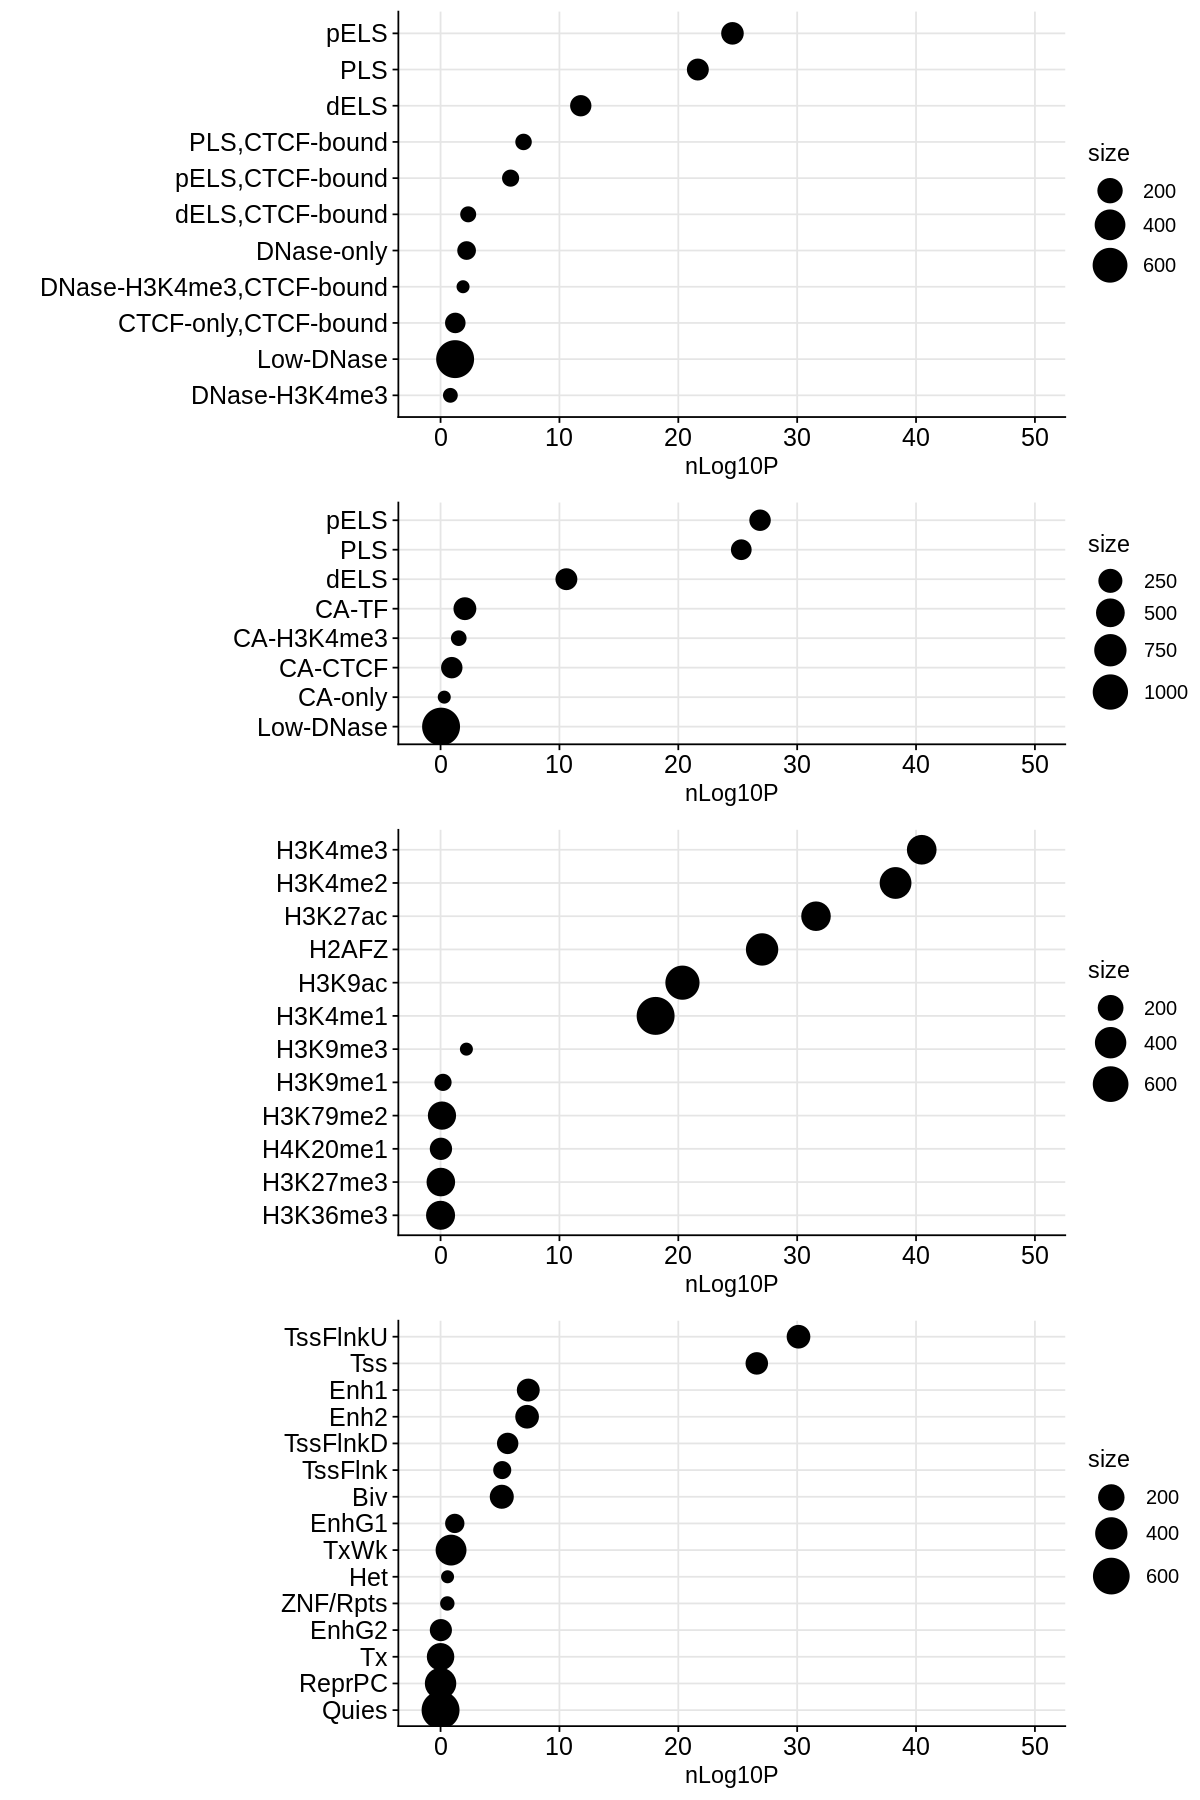

In [31]:
theme_text = theme(
        axis.text.x = element_text(size=15),
        axis.text.y = element_text(size=15)
)

theme_grid = theme(
    panel.grid.major.x = element_line(
        color     = "grey90",
        linewidth = 0.5,
        linetype  = 1),
    panel.grid.major.y = element_line(
        color     = "grey90",
        linewidth = 0.5,
        linetype  = 1),
    panel.grid.minor.y = element_line(
        color     = "grey90",
        linewidth = 0.5,
        linetype  = 1)
)

dat = dat_enrich_total
dat = dat %>% dplyr::filter(Annotation %in% c("ccre_v3", "ccre_v4", "ChIPseq_Histone", "ChromHMM"))

lst = split(dat, dat$Annotation)
lst_gpt = lapply(lst, function(dat){
    dat = dat %>%
        dplyr::arrange(nLogP) %>%
        dplyr::mutate(Label = factor(Label, levels=Label))
    
    gpt = ggplot(dat, aes(x = nLogP, y=Label, size=size)) + 
        geom_point() + 
        scale_size(range = c(3, 10)) +
        theme_cowplot() +
        labs(x = "nLog10P", y = "") +
        theme_cowplot() +
        theme_grid  +
        theme_text
    return(gpt)
})

lst_gpt = lapply(lst_gpt, function(gpt){
    gpt = gpt + 
        scale_x_continuous(breaks = c(0, 1, 2, 3, 5, 10, 15, 20, 25, 30, 50)) +
        xlim(-1, 50)
    return(gpt)
})

options(repr.plot.height=15, repr.plot.width=10)
plot_grid(
    plotlist = lst_gpt,
    ncol  = 1,
    align = "v",
    rel_heights=c(3,2,3,3))

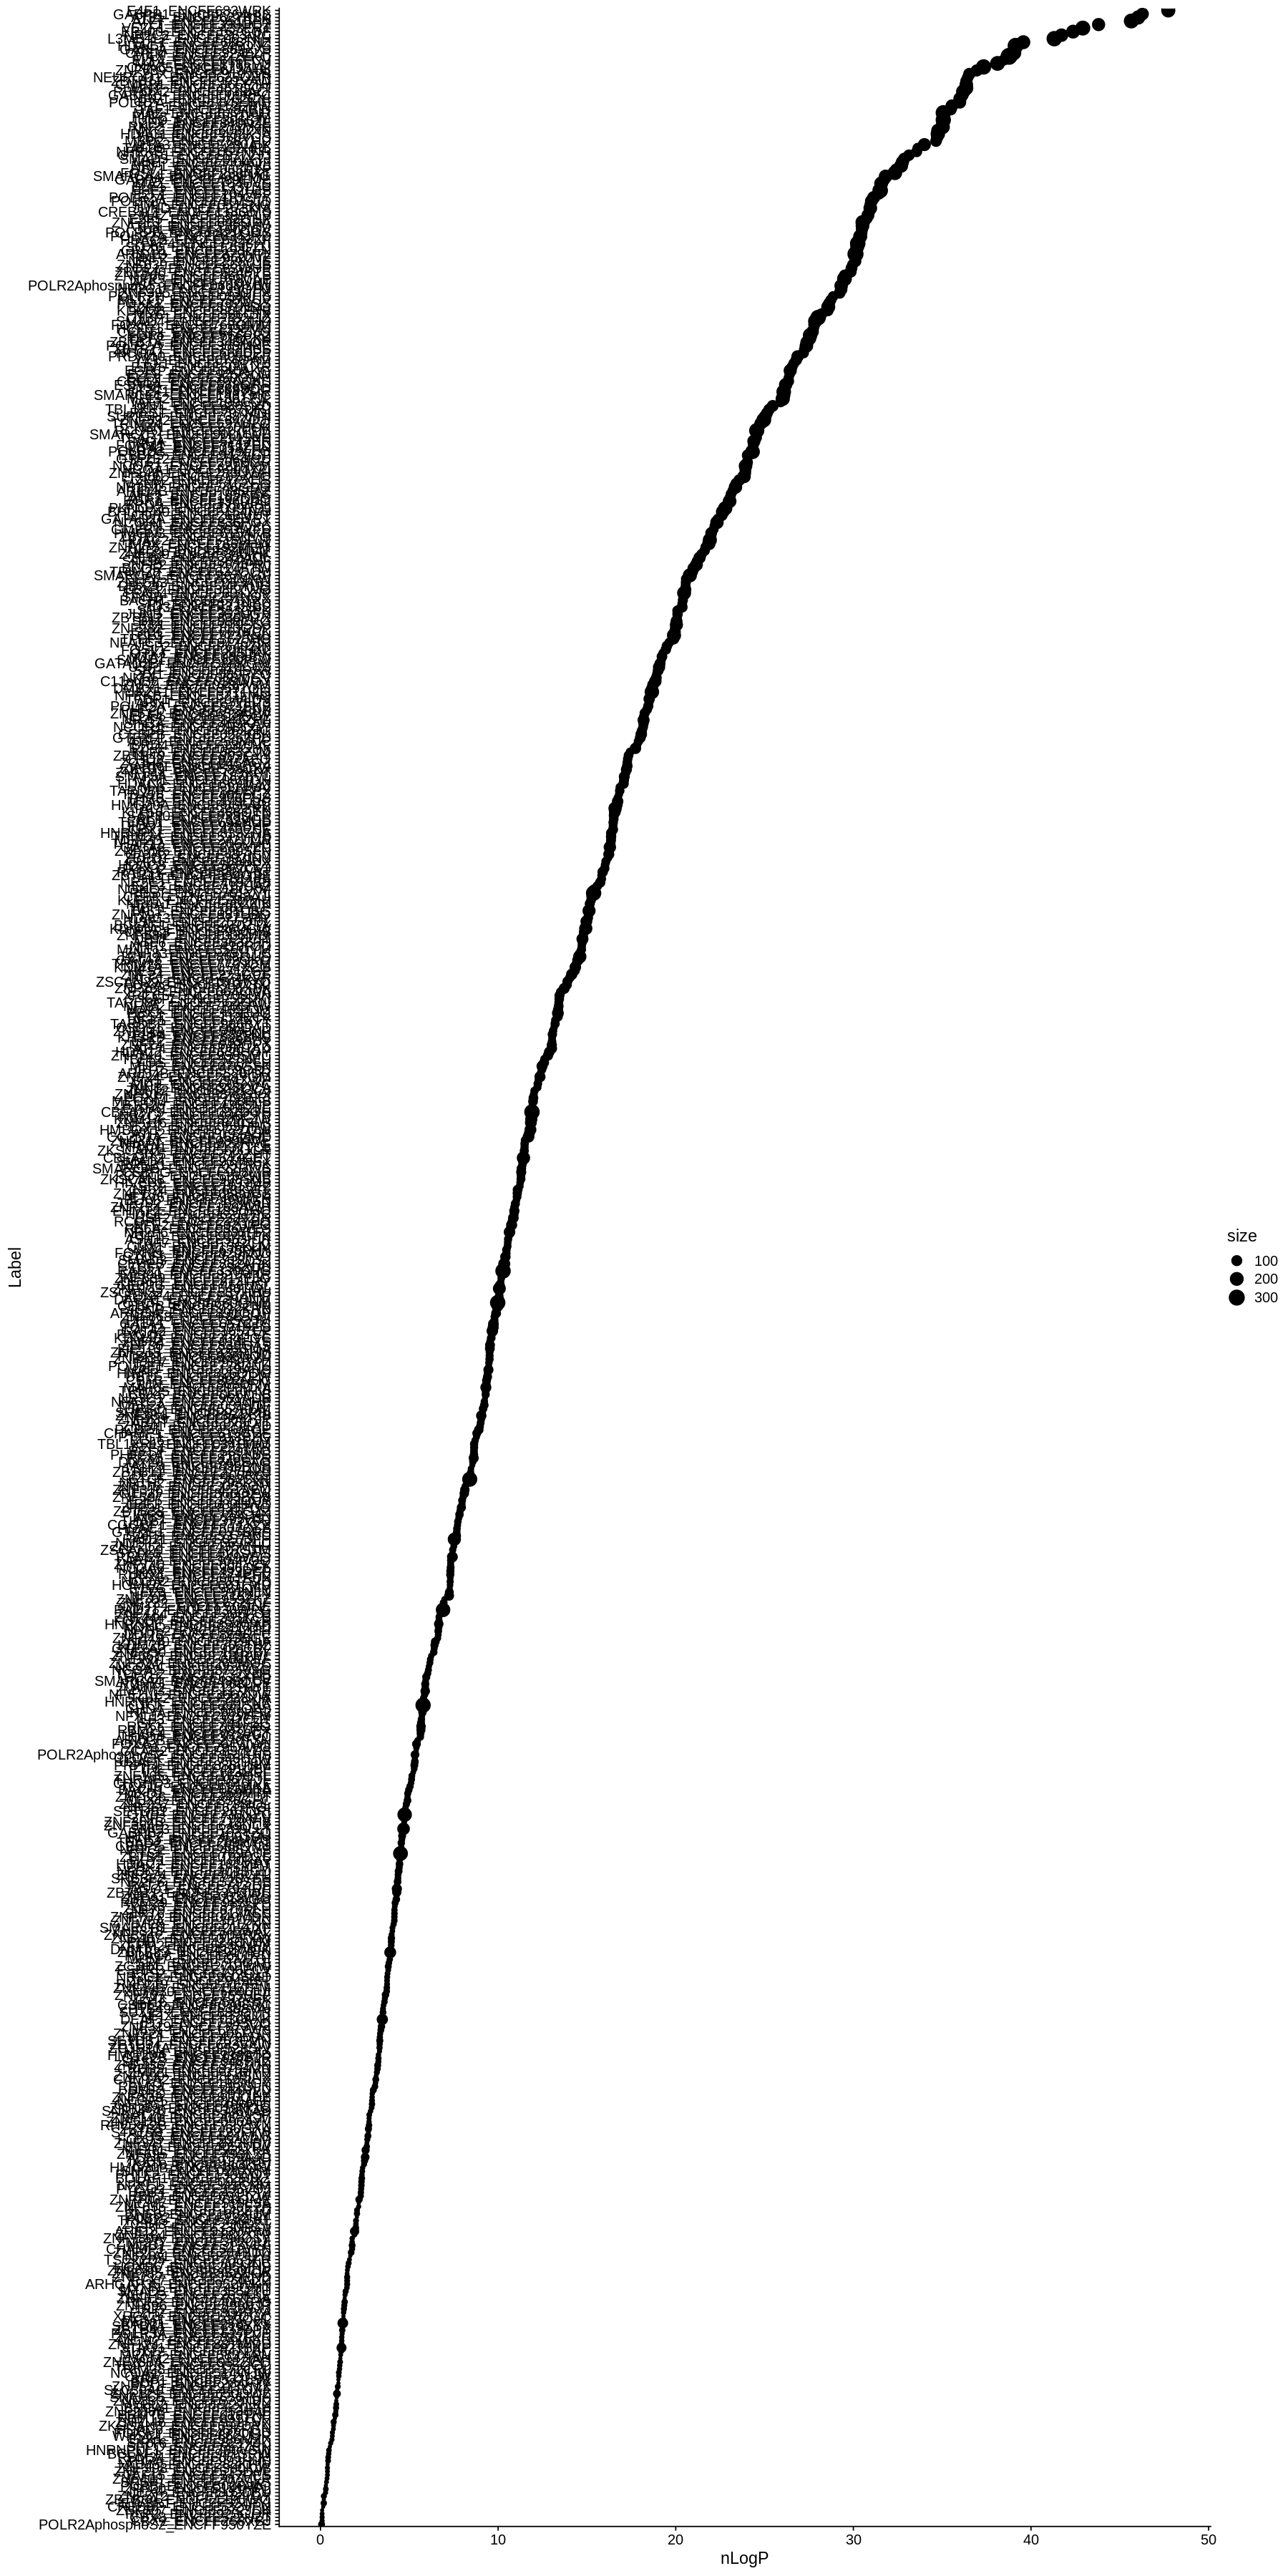

In [34]:
dat = dat_enrich_total
dat = dat %>% 
    dplyr::filter(Annotation == "ChIPseq_TF") %>%
    dplyr::arrange(nLogP) %>%
    dplyr::mutate(Label = factor(Label, levels=Label))

gpt = ggplot(dat, aes(x=nLogP, y=Label, size=size)) +
     geom_point() +
     theme_cowplot()

options(repr.plot.height=30, repr.plot.width=15)
print(gpt)

In [ ]:
dat = dat_enrich
dat = dat %>% 
    dplyr::filter(Annotation == "ccre_v4") %>%
    dplyr::arrange(nLogP) %>%
    dplyr::mutate(Label = factor(Label, levels=Label))

gpt = ggplot(dat, aes(x=nLogP, y=Label, size=size)) +
     geom_point() +
     scale_size(range=c(2,10)) +
     scale_x_continuous(
         breaks = c(0, 1, 2, 3, 5, 10, 15, 20, 25, 30)) +
     theme_cowplot() +
     theme(
         panel.grid.major.x = element_line(color = "grey50", size = 0.5, linetype = 2),
         panel.grid.major.y = element_line(color = "grey90", size = 0.5, linetype = 1)
     )

options(repr.plot.height=4, repr.plot.width=10)
print(gpt)